In [1345]:
import os

# Read data

import pandas as pd

# Possible useful features:
# [0:id, 7:neighborhood_overview, 9:host_id, 15:host_response_time, 16:host_response_rate, 17:host_acceptance_rate(Survivorship bias?), 18:host_is_superhost, 22:host_listings_count, 24:host_verifications, 26:host_identity_verified, 28:neighbourhood_cleansed, 30:latitude, 31:longitude, 32:property_type, 33:room_type, 34:accommodates, 36:bathrooms_text, 37:bedrooms, 38:beds, 39:amenities, 40:price, 41:minimum_nights, 50:has_availability, 51:availability_30, 52:availability_60, 53:availability_90, 54:availability_365, 56:number_of_reviews, 57:number_of_reviews_ltm, 58:number_of_reviews_l30d, 59:first_review, 69:instant_bookable, 70:calculated_host_listings_count, 74:reviews_per_month]

listings = pd.read_csv('listings.csv')
listings = listings.set_index('id')

result = pd.DataFrame()

listings.head().T

id,44077,85156,159889,162809,165828
listing_url,https://www.airbnb.com/rooms/44077,https://www.airbnb.com/rooms/85156,https://www.airbnb.com/rooms/159889,https://www.airbnb.com/rooms/162809,https://www.airbnb.com/rooms/165828
scrape_id,20220911231053,20220911231053,20220911231053,20220911231053,20220911231053
last_scraped,2022-09-12,2022-09-12,2022-09-12,2022-09-11,2022-09-11
source,city scrape,city scrape,city scrape,city scrape,city scrape
name,cosy comfortable Irish cottage twin,Cosy Comfortable Irish Cottage 1 Double Bed,Friendly Single Room,5.5 miles south of Dublin City :^),Pádraig Pearse apt. Kilmainham
...,...,...,...,...,...
calculated_host_listings_count,2,2,3,2,5
calculated_host_listings_count_entire_homes,0,0,0,0,5
calculated_host_listings_count_private_rooms,2,2,3,2,0
calculated_host_listings_count_shared_rooms,0,0,0,0,0


In [1346]:
listings.dtypes

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [1347]:
# Check NULL
listings.isna().sum()

listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1357
Length: 74, dtype: int64

In [1348]:
# Process host_id?


In [1349]:
# Process host_response_time
listings['host_response_time'].value_counts()

within an hour        2628
within a few hours     748
within a day           465
a few days or more      91
Name: host_response_time, dtype: int64

In [1350]:
listings['host_response_time'].fillna('unknown', inplace=True)
result['host_response_time'] = listings['host_response_time']
listings['host_response_time'].value_counts()

unknown               3634
within an hour        2628
within a few hours     748
within a day           465
a few days or more      91
Name: host_response_time, dtype: int64

In [1351]:
# Process host_response_rate
listings['host_response_rate'].value_counts()

100%    2769
90%      134
99%      102
98%       86
85%       75
86%       53
80%       50
92%       48
93%       46
82%       46
96%       45
0%        41
75%       39
50%       38
97%       35
91%       31
70%       30
95%       28
79%       26
83%       24
89%       21
94%       21
67%       19
33%       15
88%       15
60%       15
20%       11
84%        6
43%        6
40%        6
73%        5
57%        5
78%        4
71%        4
63%        4
87%        4
64%        3
58%        3
14%        2
74%        2
10%        2
55%        2
25%        2
38%        1
47%        1
81%        1
44%        1
17%        1
76%        1
11%        1
42%        1
65%        1
Name: host_response_rate, dtype: int64

In [1352]:
listings['host_response_rate'] = listings['host_response_rate'].str[:-1].astype('float64')
listings['host_response_rate'].value_counts()

100.0    2769
90.0      134
99.0      102
98.0       86
85.0       75
86.0       53
80.0       50
92.0       48
93.0       46
82.0       46
96.0       45
0.0        41
75.0       39
50.0       38
97.0       35
91.0       31
70.0       30
95.0       28
79.0       26
83.0       24
89.0       21
94.0       21
67.0       19
33.0       15
88.0       15
60.0       15
20.0       11
84.0        6
43.0        6
40.0        6
73.0        5
57.0        5
78.0        4
71.0        4
63.0        4
87.0        4
64.0        3
58.0        3
14.0        2
74.0        2
10.0        2
55.0        2
25.0        2
38.0        1
47.0        1
81.0        1
44.0        1
17.0        1
76.0        1
11.0        1
42.0        1
65.0        1
Name: host_response_rate, dtype: int64

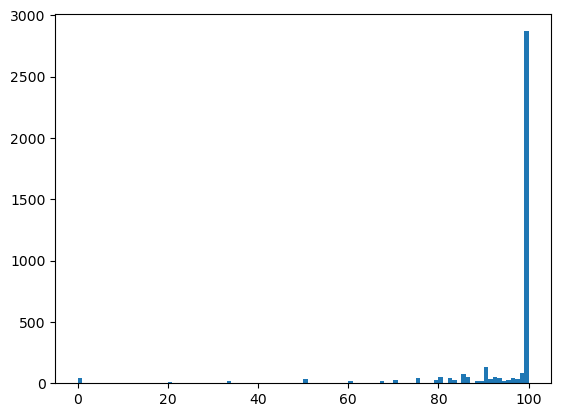

In [1353]:
from matplotlib import pyplot as plt

plt.hist(listings['host_response_rate'], bins=100)
plt.show()

In [1354]:
listings['host_response_rate'] = pd.cut(listings['host_response_rate'],
                                        bins=[0, 70, 80, 90, 98, 100],
                                        labels=['0%-69%', '70%-79%', '80%-89%', '90%-97%', '98%-100%'],
                                        include_lowest=True)
listings['host_response_rate'] = listings['host_response_rate'].astype('str')
listings['host_response_rate'].replace('nan', 'unknown', inplace=True)
result['host_response_rate'] = listings['host_response_rate']
listings['host_response_rate'].value_counts()

unknown     3634
98%-100%    2871
80%-89%      379
90%-97%      340
0%-69%       211
70%-79%      131
Name: host_response_rate, dtype: int64

In [1355]:
# Process host_acceptance_rate
listings['host_acceptance_rate'].value_counts()

100%    1282
99%      265
98%      224
96%      149
97%      141
        ... 
8%         1
1%         1
10%        1
6%         1
7%         1
Name: host_acceptance_rate, Length: 95, dtype: int64

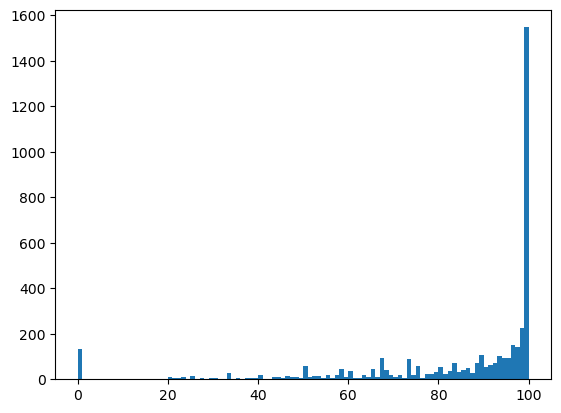

In [1356]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str[:-1].astype('float64')
plt.hist(listings['host_acceptance_rate'], bins=100)
plt.show()

In [1357]:
listings['host_acceptance_rate'] = pd.cut(listings['host_acceptance_rate'],
                                          bins=[0, 70, 80, 90, 97, 100],
                                          labels=['0%-69%', '70%-79%', '80%-89%', '90%-96%', '97%-100%'],
                                          include_lowest=True)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype('str')
listings['host_acceptance_rate'].replace('nan', 'unknown', inplace=True)
result['host_acceptance_rate'] = listings['host_acceptance_rate']
listings['host_acceptance_rate'].value_counts()

unknown     3375
97%-100%    1771
0%-69%       860
90%-96%      714
80%-89%      519
70%-79%      327
Name: host_acceptance_rate, dtype: int64

In [1358]:
# Process host_is_superhost
result['host_is_superhost'] = listings['host_is_superhost']
listings['host_is_superhost'].value_counts()

f    6589
t     977
Name: host_is_superhost, dtype: int64

In [1359]:
# Process host_listings_count, use calculated_host_listings_count because it's more accurate
listings['calculated_host_listings_count'].value_counts(dropna=False)

1     4527
2     1138
3      480
5      225
4      208
6      108
8       96
9       90
7       77
10      70
66      66
12      60
55      55
48      48
11      44
42      42
38      38
31      31
15      30
14      28
13      26
23      23
20      20
19      19
17      17
Name: calculated_host_listings_count, dtype: int64

(array([4527., 1138.,  480.,  208.,  225.,  108.,   77.,   96.,   90.,
          70.,   44.,   60.,   26.,    0.,   28.,   30.,    0.,   17.,
           0.,   19.,   20.,    0.,    0.,   23.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,   31.,    0.,    0.,    0.,
           0.,    0.,    0.,   38.,    0.,    0.,    0.,    0.,   42.,
           0.,    0.,    0.,    0.,    0.,   48.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   55.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   66.]),
 array([ 1.        ,  1.92857143,  2.85714286,  3.78571429,  4.71428571,
         5.64285714,  6.57142857,  7.5       ,  8.42857143,  9.35714286,
        10.28571429, 11.21428571, 12.14285714, 13.07142857, 14.        ,
        14.92857143, 15.85714286, 16.78571429, 17.71428571, 18.64285714,
        19.57142857, 20.5       , 21.42857143, 22.35714286, 23.28571429,
        24.21428571, 25.14285714, 26.07142857, 27.        , 27.92857143,
      

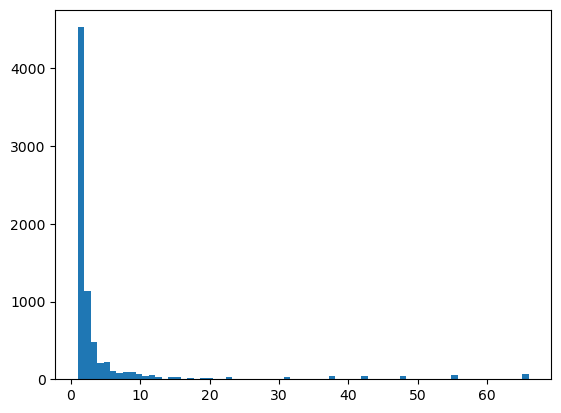

In [1360]:
plt.hist(listings['calculated_host_listings_count'], bins=70)

In [1361]:
listings['calculated_host_listings_count'] = pd.cut(listings['calculated_host_listings_count'],
                                                    bins=[1, 2, 5, 10, 30, 100],
                                                    labels=['1', '2-4', '5-9', '10-29', '>29'],
                                                    include_lowest=True)
listings['calculated_host_listings_count'] = listings['calculated_host_listings_count'].astype('str')
result['calculated_host_listings_count'] = listings['calculated_host_listings_count']
listings['calculated_host_listings_count'].value_counts(dropna=False)

1        5665
2-4       913
5-9       441
>29       280
10-29     267
Name: calculated_host_listings_count, dtype: int64

In [1362]:
# Process host_identity_verified
result['host_identity_verified'] = listings['host_identity_verified']
listings['host_identity_verified'].value_counts(dropna=False)

t    5629
f    1937
Name: host_identity_verified, dtype: int64

In [1363]:
# Process neighbourhood_cleansed
result['neighbourhood_cleansed'] = listings['neighbourhood_cleansed']
listings['neighbourhood_cleansed'].value_counts(dropna=False)

Dublin City              5566
Dn Laoghaire-Rathdown     905
Fingal                    757
South Dublin              338
Name: neighbourhood_cleansed, dtype: int64

In [1364]:
# Process property_type
listings['property_type'].value_counts(dropna=False)

Entire rental unit                   1518
Private room in home                 1457
Private room in rental unit          1161
Entire home                          1080
Entire condo                          551
                                     ... 
Tipi                                    1
Private room in floor                   1
Shared room in loft                     1
Castle                                  1
Shared room in serviced apartment       1
Name: property_type, Length: 63, dtype: int64

In [1365]:
for i, v in listings['property_type'].value_counts(dropna=False).items():
    if v < 40:
        listings['property_type'].replace(i, 'others', inplace=True)
result['property_type'] = listings['property_type']
listings['property_type'].value_counts(dropna=False)

Entire rental unit                   1518
Private room in home                 1457
Private room in rental unit          1161
Entire home                          1080
Entire condo                          551
others                                458
Private room in condo                 341
Private room in townhouse             256
Entire townhouse                      248
Private room in bed and breakfast     106
Entire serviced apartment              91
Shared room in rental unit             86
Entire cottage                         57
Shared room in home                    55
Entire guest suite                     54
Entire guesthouse                      47
Name: property_type, dtype: int64

In [1366]:
# Process room_type
result['room_type'] = listings['room_type']
listings['room_type'].value_counts(dropna=False)

/Users/eytins/.conda/envs/ml/lib/python3.10/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Entire home/apt    3786
Private room       3563
Shared room         175
Hotel room           42
Name: room_type, dtype: int64

In [1367]:
# Process accommodates
listings['accommodates'].value_counts(dropna=False)

2     3579
4     1354
1      979
6      517
3      417
5      359
7      134
8      132
10      32
9       25
12      10
11       8
16       7
15       5
14       5
13       3
Name: accommodates, dtype: int64

(array([9.790e+02, 3.579e+03, 4.170e+02, 1.354e+03, 3.590e+02, 5.170e+02,
        1.340e+02, 1.320e+02, 2.500e+01, 3.200e+01, 8.000e+00, 1.000e+01,
        3.000e+00, 5.000e+00, 5.000e+00, 7.000e+00]),
 array([ 1.    ,  1.9375,  2.875 ,  3.8125,  4.75  ,  5.6875,  6.625 ,
         7.5625,  8.5   ,  9.4375, 10.375 , 11.3125, 12.25  , 13.1875,
        14.125 , 15.0625, 16.    ]),
 <BarContainer object of 16 artists>)

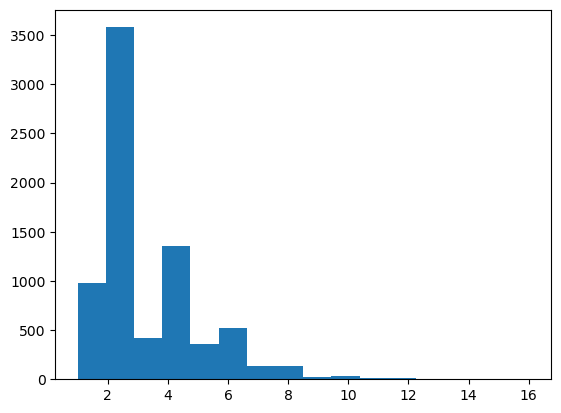

In [1368]:
plt.hist(listings['accommodates'], bins=16)

In [1369]:
listings['accommodates'] = pd.cut(listings['accommodates'],
                                  bins=[0, 1, 2, 3, 4, 5, 20],
                                  labels=['1', '2', '3', '4', '5', '>5'],
                                  include_lowest=True)
listings['accommodates'] = listings['accommodates'].astype('str')
result['accommodates'] = listings['accommodates']
listings['accommodates'].value_counts(dropna=False)

2     3579
4     1354
1      979
>5     878
3      417
5      359
Name: accommodates, dtype: int64

In [1370]:
# Process bathrooms_text
listings['bathrooms_text'].value_counts(dropna=False)

1 bath               2581
1 shared bath        1495
1 private bath        978
2 baths               851
1.5 baths             569
1.5 shared baths      307
2.5 baths             275
3 baths               145
2 shared baths        121
3.5 baths              58
4 baths                37
2.5 shared baths       31
0 shared baths         19
0 baths                18
3 shared baths         16
4.5 baths              14
Shared half-bath       10
Half-bath               8
5 baths                 7
NaN                     4
3.5 shared baths        4
Private half-bath       4
5.5 baths               3
4 shared baths          2
6 baths                 2
9.5 baths               1
7.5 baths               1
8.5 baths               1
6 shared baths          1
8 baths                 1
7 baths                 1
6.5 baths               1
Name: bathrooms_text, dtype: int64

In [1371]:
for i, v in listings['bathrooms_text'].value_counts(dropna=False).items():
    if v < 100:
        listings['bathrooms_text'].replace(i, 'others', inplace=True)
result['bathrooms_text'] = listings['bathrooms_text']
listings['bathrooms_text'].value_counts(dropna=False)

1 bath              2581
1 shared bath       1495
1 private bath       978
2 baths              851
1.5 baths            569
1.5 shared baths     307
2.5 baths            275
others               244
3 baths              145
2 shared baths       121
Name: bathrooms_text, dtype: int64

In [1372]:
# Process bedrooms
listings['bedrooms'].value_counts(dropna=False)

1.0     4968
2.0     1441
3.0      573
4.0      285
NaN      205
5.0       72
6.0       14
7.0        5
9.0        1
13.0       1
8.0        1
Name: bedrooms, dtype: int64

In [1373]:
listings['bedrooms'] = pd.cut(listings['bedrooms'],
                              bins=[0, 1, 2, 3, 4, 5, 14],
                              labels=['1', '2', '3', '4', '5', '>5'],
                              include_lowest=True)
listings['bedrooms'] = listings['bedrooms'].astype('str')
listings['bedrooms'].replace('nan', 'unknown', inplace=True)
result['bedrooms'] = listings['bedrooms']
listings['bedrooms'].value_counts(dropna=False)

1          4968
2          1441
3           573
4           285
unknown     205
5            72
>5           22
Name: bedrooms, dtype: int64

In [1374]:
# Process beds
listings['beds'].value_counts(dropna=False)

1.0     4268
2.0     1669
3.0      785
4.0      404
5.0      184
NaN       94
6.0       85
7.0       35
8.0       12
9.0        9
10.0       7
12.0       6
13.0       2
15.0       2
18.0       2
14.0       1
16.0       1
Name: beds, dtype: int64

In [1375]:
listings['beds'] = pd.cut(listings['beds'],
                          bins=[0, 1, 2, 3, 4, 5, 6, 20],
                          labels=['1', '2', '3', '4', '5', '6', '>6'],
                          include_lowest=True)
listings['beds'] = listings['beds'].astype('str')
listings['beds'].replace('nan', 'unknown', inplace=True)
result['beds'] = listings['beds']
listings['beds'].value_counts(dropna=False)

1          4268
2          1669
3           785
4           404
5           184
unknown      94
6            85
>6           77
Name: beds, dtype: int64

In [1376]:
# Process amenities
result['amenities'] = listings['amenities']
listings['amenities'].isna().sum()
listings['amenities'][:2].values

array(['["Oven", "Hot water kettle", "Fire extinguisher", "Outdoor furniture", "Dining table", "Hangers", "Indoor fireplace", "Long term stays allowed", "Carbon monoxide alarm", "Cooking basics", "Breakfast", "Microwave", "Shared patio or balcony", "Paid washer \\u2013 In unit", "Private fenced garden or backyard", "Free driveway parking on premises", "Central heating", "Mini fridge", "Clothing storage: closet", "Ethernet connection", "Dishes and silverware", "First aid kit", "Paid dryer \\u2013 In unit", "Cleaning products", "Hot water", "Shower gel", "Lock on bedroom door", "Hair dryer", "Single level home", "Iron", "Dishwasher", "Freezer", "Air conditioning", "Free street parking", "Bathtub", "Shampoo", "Coffee maker", "Essentials", "Refrigerator", "Conditioner", "Body soap", "Bed linens", "Toaster", "Wifi", "Lockbox", "Smoke alarm", "Room-darkening shades", "Outdoor dining area", "Wine glasses", "Extra pillows and blankets"]',
       '["Oven", "Fire extinguisher", "Dryer", "Hangers

In [1377]:
amenities_list = list(listings['amenities'])
amenities_list_str = ''.join(amenities_list)
amenities_list_str = amenities_list_str.replace('][', ',')
amenities_set = [s.strip() for s in amenities_list_str.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '"100\\" HDTV with Amazon Prime Video"',
 '"Fast wifi \\u2013 93 Mbps"',
 '"General conditioner"',
 '"Game console: Nintendo Switch and PS4"',
 '"Zanussi oven"',
 '"Bathroom essentials"',
 '"Free washer \\u2013 In unit"',
 '"Cog\\u0113rie Paris  body soap"',
 '"TV with premium cable',
 '"Rangemaster electric stove"',
 '"Private hot tub - available all year"',
 '"Mini oven oven"',
 '"Game console"',
 '"Various Brands shampoo"',
 '"Fast wifi \\u2013 77 Mbps"',
 '"Fast wifi \\u2013 411 Mbps"',
 '"32\\" TV with premium cable',
 '"Undercounter fridge with small freezer section. refrigerator"',
 '"52\\" HDTV with premium cable"',
 '"Treseme shampoo"',
 '"Fast wifi \\u2013 65 Mbps"',
 '"Gas stove"',
 '"Fast wifi \\u2013 518 Mbps"',
 '"65\\" HDTV with Chromecast',
 '"Pantene body soap"',
 '"Various Brands conditioner"',
 '"Wifi \\u2013 23 Mbps"',
 '"Soapy body soap"',
 '"43\\" HDTV with standard cable"',
 '"Electric stove"',
 '"64\\" HDTV with Amazon Prime Video',
 '"42\\" TV with standa

In [1378]:
# Process price (No null)
listings['price'] = listings['price'].str[1:].str.replace(',', '').astype('float64')
result['price'] = listings['price']
listings['price']

id
44077                  70.0
85156                  67.0
159889                 45.0
162809                 80.0
165828                251.0
                      ...  
712909401324393615    200.0
712914322433199115     48.0
712914393022526732     64.0
712966369602352444    240.0
713034176403340330    280.0
Name: price, Length: 7566, dtype: float64

1125

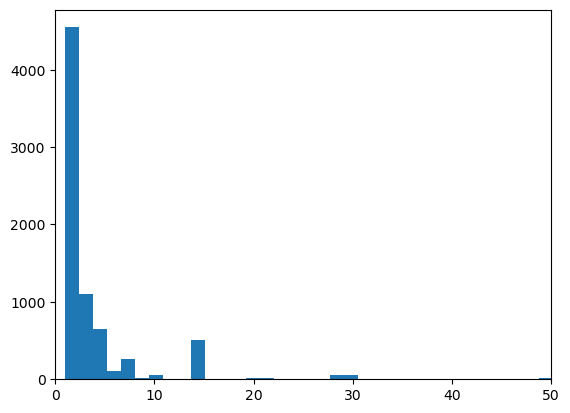

In [1379]:
# Process minimum_nights
plt.hist(listings['minimum_nights'], bins=800)
plt.xlim(0, 50)
listings['minimum_nights'].max()

In [1380]:
listings['minimum_nights'].isna().sum()

0

In [1381]:
listings['minimum_nights'] = pd.cut(listings['minimum_nights'],
                                    bins=[0, 1, 2, 3, 4, 5, 6, 33, 1126],
                                    labels=['1', '2', '3', '4', '5', '6', '7-33', '>33'],
                                    include_lowest=True)
listings['minimum_nights'] = listings['minimum_nights'].astype('str')
listings['minimum_nights'].replace('nan', 'unknown', inplace=True)
result['minimum_nights'] = listings['minimum_nights']
listings['minimum_nights'].value_counts(dropna=False)

1       2375
2       2173
3       1107
7-33    1026
5        331
4        318
>33      134
6        102
Name: minimum_nights, dtype: int64

In [1382]:
# Process has_availability
result['has_availability'] = listings['has_availability']
listings['has_availability'].value_counts(dropna=False)

t    7537
f      29
Name: has_availability, dtype: int64

In [1383]:
# Process availability_30
result['availability_30'] = listings['availability_30']
listings['availability_30'].value_counts(dropna=False)

0     5122
2      260
1      246
3      197
4      157
7      144
5      143
6      137
8      116
10     108
11     106
9       96
13      75
12      75
15      63
17      58
14      47
18      44
23      43
16      41
20      40
24      34
19      33
22      31
27      30
30      27
21      26
29      21
25      21
28      14
26      11
Name: availability_30, dtype: int64

In [1384]:
# Process number_of_reviews
result['number_of_reviews'] = listings['number_of_reviews']
listings['number_of_reviews'].value_counts(dropna=False)

0      1357
1       749
2       516
3       381
4       290
       ... 
443       1
432       1
275       1
340       1
212       1
Name: number_of_reviews, Length: 356, dtype: int64

In [1385]:
# Process first_review
result['first_review'] = listings['first_review']
listings['first_review'].isna().sum()

1357

In [1386]:
listings['review_scores_rating'].isna().sum()
# Other scores' amount of null are around 1450
# Took a look by excel, if first_review is null, the scores are null.

1357

In [1387]:
listings = listings.dropna(subset=['first_review'])
result = result.dropna(subset=['first_review'])
result['first_review'].isna().sum()

0

In [1388]:
# Change the date into the time gap between the date and 2022-11-12
from datetime import datetime


def count_days(x):
    file_time = datetime.strptime('2022-11-12', '%Y-%m-%d')
    self_time = datetime.strptime(x, '%Y-%m-%d')
    d = file_time - self_time
    return d.days


result['first_review'] = result['first_review'].apply(lambda x: count_days(x), 1)
result['first_review']

id
44077                 4255
85156                 4190
159889                3889
162809                2721
165828                4036
                      ... 
707685389742134998      63
707825078259308780      66
708679904448712003      62
709451504510289772      62
710054111904793673      63
Name: first_review, Length: 6209, dtype: int64

In [1389]:
# Process instant_bookable
result['instant_bookable'] = listings['instant_bookable']
listings['instant_bookable'].value_counts(dropna=False)

f    3936
t    2273
Name: instant_bookable, dtype: int64

In [1390]:
# Process reviews_per_month
result['reviews_per_month'] = listings['reviews_per_month']
listings['reviews_per_month'].value_counts(dropna=False)

0.02     264
0.03     210
1.00     160
0.06     154
0.01     139
        ... 
5.36       1
9.97       1
5.58       1
12.43      1
9.00       1
Name: reviews_per_month, Length: 675, dtype: int64

In [1391]:
result['review_scores_rating'] = listings['review_scores_rating']
result['review_scores_value'] = listings['review_scores_value']
result['review_scores_checkin'] = listings['review_scores_checkin']
result['review_scores_accuracy'] = listings['review_scores_accuracy']
result['review_scores_location'] = listings['review_scores_location']
result['review_scores_cleanliness'] = listings['review_scores_cleanliness']
result['review_scores_communication'] = listings['review_scores_communication']
result

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,calculated_host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,first_review,instant_bookable,reviews_per_month,review_scores_rating,review_scores_value,review_scores_checkin,review_scores_accuracy,review_scores_location,review_scores_cleanliness,review_scores_communication
id,,,,,,,,,,,,,,,,,,,,,
44077,within an hour,98%-100%,97%-100%,t,1,t,Dn Laoghaire-Rathdown,others,Private room,2,...,4255,f,1.85,4.78,4.82,4.93,4.83,4.66,4.74,4.93
85156,within an hour,98%-100%,97%-100%,t,1,t,Dn Laoghaire-Rathdown,others,Private room,2,...,4190,f,1.53,4.79,4.78,4.90,4.86,4.64,4.74,4.88
159889,within an hour,98%-100%,90%-96%,f,2-4,t,Dublin City,Private room in home,Private room,1,...,3889,f,2.78,4.74,4.74,4.86,4.77,4.63,4.71,4.90
162809,within an hour,90%-97%,80%-89%,t,1,t,Dn Laoghaire-Rathdown,Private room in townhouse,Private room,>5,...,2721,f,3.68,4.84,4.85,4.95,4.88,4.77,4.85,4.97
165828,within an hour,98%-100%,90%-96%,f,2-4,t,Dublin City,Entire rental unit,Entire home/apt,5,...,4036,t,0.48,4.63,4.55,4.81,4.89,4.34,4.69,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707685389742134998,within a few hours,98%-100%,97%-100%,f,1,t,Dublin City,Private room in home,Private room,2,...,63,f,1.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00
707825078259308780,within an hour,90%-97%,97%-100%,f,10-29,t,Dublin City,Shared room in rental unit,Shared room,1,...,66,t,1.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
708679904448712003,within an hour,98%-100%,97%-100%,f,1,t,Dublin City,Entire home,Entire home/apt,>5,...,62,f,1.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [1392]:
os.remove('new_listings.csv')
result.to_csv('new_listings.csv')